## K-Nearest Neighbour (K-NN)

In [1]:
# Importing Modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split 

In [2]:
iris = pd.read_csv('./AI_DATA/iris_csv.csv')
iris.head()

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris.shape

(150, 5)

In [5]:
iris['class'].value_counts()

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [6]:
iris.columns

Index(['sepallength', 'sepalwidth', 'petallength', 'petalwidth', 'class'], dtype='object')

In [7]:
iris.values

array([[5.1, 3.5, 1.4, 0.2, 'Iris-setosa'],
       [4.9, 3.0, 1.4, 0.2, 'Iris-setosa'],
       [4.7, 3.2, 1.3, 0.2, 'Iris-setosa'],
       [4.6, 3.1, 1.5, 0.2, 'Iris-setosa'],
       [5.0, 3.6, 1.4, 0.2, 'Iris-setosa'],
       [5.4, 3.9, 1.7, 0.4, 'Iris-setosa'],
       [4.6, 3.4, 1.4, 0.3, 'Iris-setosa'],
       [5.0, 3.4, 1.5, 0.2, 'Iris-setosa'],
       [4.4, 2.9, 1.4, 0.2, 'Iris-setosa'],
       [4.9, 3.1, 1.5, 0.1, 'Iris-setosa'],
       [5.4, 3.7, 1.5, 0.2, 'Iris-setosa'],
       [4.8, 3.4, 1.6, 0.2, 'Iris-setosa'],
       [4.8, 3.0, 1.4, 0.1, 'Iris-setosa'],
       [4.3, 3.0, 1.1, 0.1, 'Iris-setosa'],
       [5.8, 4.0, 1.2, 0.2, 'Iris-setosa'],
       [5.7, 4.4, 1.5, 0.4, 'Iris-setosa'],
       [5.4, 3.9, 1.3, 0.4, 'Iris-setosa'],
       [5.1, 3.5, 1.4, 0.3, 'Iris-setosa'],
       [5.7, 3.8, 1.7, 0.3, 'Iris-setosa'],
       [5.1, 3.8, 1.5, 0.3, 'Iris-setosa'],
       [5.4, 3.4, 1.7, 0.2, 'Iris-setosa'],
       [5.1, 3.7, 1.5, 0.4, 'Iris-setosa'],
       [4.6, 3.6, 1.0, 0.2, 'Iri

In [22]:
# splitting the data
X = iris.iloc[:,:4]
X.head()

y = iris.iloc[:,-1]
y.head()

# Preprocessing the data
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)
X[0:4]

# splitting data into test and train sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [26]:
# Creating the instance of the model
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)

y_predict = clf.predict(X_test)

In [32]:
# Checking the accuracy of the model
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_predict))

0.9777777777777777


In [33]:
# Checking the Confusion Matrix of the model
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_predict))

[[14  0  0]
 [ 0 18  0]
 [ 0  1 12]]


In [37]:
predict_output = pd.DataFrame(data=[y_test.values,y_predict],
                              index=['y_test','y_predict'])
predict_output.transpose().head()

,y_test,y_predict
0,Iris-setosa,Iris-setosa
1,Iris-versicolor,Iris-versicolor
2,Iris-versicolor,Iris-versicolor
3,Iris-setosa,Iris-setosa
4,Iris-virginica,Iris-virginica


In [38]:
y_pred = clf.predict([[2.3,2.4,5.6,3.2]])
print(y_pred)

['Iris-virginica']


In [46]:
ks = 21
mean_acc = np.zeros((ks-1))
error_rate = []

for n in range(1,ks):
    neigh = KNeighborsClassifier(n_neighbors=n).fit(X_train,y_train)
    yhat = neigh.predict(X_test)
    mean_acc[n-1] = accuracy_score(y_test,yhat)
    error_rate.append(np.mean(yhat!=y_test))

print(mean_acc,'\n')
print(error_rate,'\n')
print("The best accurcy was with:",mean_acc.max(),"with K:",mean_acc.argmax()+1)

[0.95555556 0.95555556 0.97777778 0.95555556 0.95555556 0.97777778
 0.97777778 0.97777778 0.95555556 0.95555556 0.95555556 0.95555556
 0.95555556 0.95555556 0.95555556 0.95555556 0.93333333 0.93333333
 0.93333333 0.95555556] 

[0.044444444444444446, 0.044444444444444446, 0.022222222222222223, 0.044444444444444446, 0.044444444444444446, 0.022222222222222223, 0.022222222222222223, 0.022222222222222223, 0.044444444444444446, 0.044444444444444446, 0.044444444444444446, 0.044444444444444446, 0.044444444444444446, 0.044444444444444446, 0.044444444444444446, 0.044444444444444446, 0.06666666666666667, 0.06666666666666667, 0.06666666666666667, 0.044444444444444446] 

The best accurcy was with: 0.9777777777777777 with K: 3


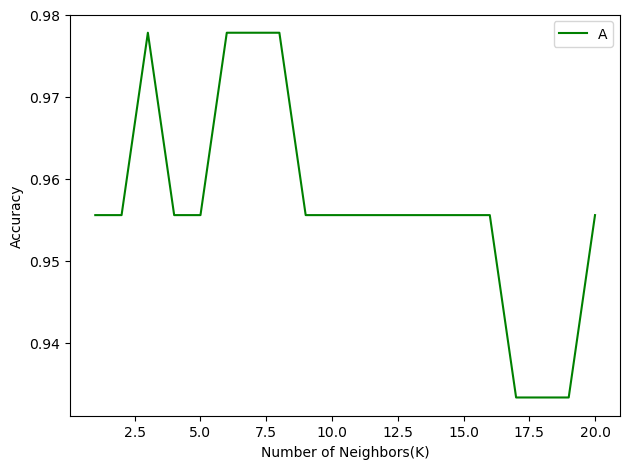

In [47]:
# Plotting the data

plt.plot(range(1,ks),mean_acc,'g')
plt.legend('Accracy')
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors(K)')
plt.tight_layout()
plt.show()